In [47]:
import tensorflow as tf
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # For plotting
from sklearn.preprocessing import OneHotEncoder

In [2]:
tf.__version__

'1.11.0'

In [15]:
def get_mnist_data():

    dirname, _ = os.path.split(os.path.dirname(os.path.abspath("__file__")))
    data_dir = os.path.join(dirname, "data")
    MNIST_dir = os.path.join(data_dir, "MNIST")

    if os.path.exists(MNIST_dir):
        all_files = glob.glob(MNIST_dir + "/*.csv")
        train_path = all_files[0] if 'train' in all_files[0] else all_files[1]
        test_path  = all_files[0] if 'test' in all_files[0] else all_files[1]

        train = pd.read_csv(train_path, header=None)
        X_train = train.iloc[:,1:].values/255.0
        y_train = train.iloc[:,0].values

        test = pd.read_csv(test_path, header=None)
        X_test = test.iloc[:, 1:].values/255.0
        y_test = test.iloc[:, 0].values

        y_train = y_train.reshape(-1, 1)
        y_test = y_test.reshape(-1, 1)

        return X_train, y_train, X_test, y_test
    else:
        raise IOError("Path not found!")

In [16]:
def imshow(img):
    plt.imshow(img.reshape(28, 28), cmap='gray')

In [34]:
# get the data_path
X_train, y_train, X_test, y_test = get_mnist_data()

label:  [4]


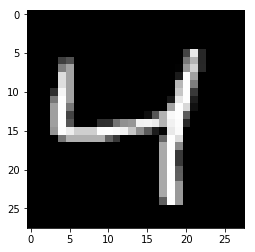

In [21]:
idx = 2
img = X_train[2]
label = y_train[2]

plt.imshow(img.reshape(28, 28), cmap='gray')
print("label: ", label)

In [44]:
# run this cell only once or else y_train will keep on changing
onehot_encoder = OneHotEncoder(categorical_features = [0]) # [0] -> which axis to be one-hot encoded?
y_train = onehot_encoder.fit_transform(y_train).toarray()
y_test = onehot_encoder.fit_transform(y_test).toarray()